In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Average_salary,Job_State,Company_age,Python_yn,AI_yn,ML_yn,Statistic_yn,Simplified_title,Seniority,desc_len
0,Data Scientist,$64K - $106K (Glassdoor est.),"Secure our Nation, Ignite your Future\nOvervie...",4.2,ManTech International Corporation,"Alexandria, VA",5001 to 10000 Employees,1968,Company - Public,Research & Development,...,85.0,VA,53,0,1,0,0,data scientist,not_specified,947
1,Sr. Data Scientist,$83K - $138K (Glassdoor est.),Sr. Data Scientist -INF0001YE\nDescription\n\n...,3.6,CNA Insurance,"Chicago, IL",1001 to 5000 Employees,1897,Company - Public,Insurance Carriers,...,110.5,IL,124,0,0,0,0,data scientist,senior,522
2,R&D Scientist,$38K - $68K (Glassdoor est.),"LGC, Biosearch Technologies is seeking a detai...",3.5,LGC Limited,"Middleton, WI",1001 to 5000 Employees,1842,Company - Private,Biotech & Pharmaceuticals,...,53.0,WI,179,0,1,0,0,not_specified,not_specified,635
3,Data Scientist,$71K - $119K (Glassdoor est.),Who Are We?\nQinetiQ Inc. is a leading innovat...,2.5,QinetiQ Inc.,"Lorton, VA",501 to 1000 Employees,1956,Subsidiary or Business Segment,Aerospace & Defense,...,95.0,VA,65,0,1,1,0,data scientist,not_specified,1084
4,Data Engineer,$44K - $87K (Glassdoor est.),Schedule: Mon- Fri Overview:\nThe data enginee...,3.8,America First Credit Union,"Ogden, UT",1001 to 5000 Employees,1939,Nonprofit Organization,Investment Banking & Asset Management,...,65.5,UT,82,0,0,0,0,data engineer,not_specified,898


### Choose relevant columns

In [23]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Per_hour', 'Salary', 'Min_salary',
       'Max_salary', 'Average_salary', 'Job_State', 'Company_age', 'Python_yn',
       'AI_yn', 'ML_yn', 'Statistic_yn', 'Simplified_title', 'Seniority',
       'desc_len'],
      dtype='object')

In [4]:
model_columns = data[['Average_salary','Rating', 'Size', 'Type of ownership','Industry',
                      'Revenue', 'Per_hour','Job_State', 'Company_age', 'Python_yn',
                      'Simplified_title', 'Seniority']]

### Transform categorical variables

In [5]:
df_dum = pd.get_dummies(model_columns, drop_first=True)

In [6]:
df_dum.columns

Index(['Average_salary', 'Rating', 'Per_hour', 'Company_age', 'Python_yn',
       'Size_1 to 50 Employees', 'Size_10000+ Employees',
       'Size_1001 to 5000 Employees', 'Size_201 to 500 Employees',
       'Size_5001 to 10000 Employees',
       ...
       'Job_State_United States', 'Job_State_Washington State',
       'Simplified_title_data engineer', 'Simplified_title_data scientist',
       'Simplified_title_director', 'Simplified_title_manager',
       'Simplified_title_ml', 'Simplified_title_not_specified',
       'Seniority_not_specified', 'Seniority_senior'],
      dtype='object', length=114)

### Train and Test split

In [7]:
X = df_dum.iloc[:,1:]
y = df_dum.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Multiple Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

mult_reg = LinearRegression()
mult_reg_score = np.mean(cross_val_score(mult_reg, X_train, y_train, cv=3, scoring='neg_mean_absolute_error'))
print(mult_reg_score)

mult_reg.fit(X_train, y_train)

-44.855688239527446


LinearRegression()

### Lasso Regression

As the number of independent variables is very close to the number of observations, we propose to use the Lasso Regression as it performs variable selection

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219.84906310549013, tolerance: 8.739582500000004
  model = cd_fast.enet_coordinate_descent(
c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550.7884170166753, tolerance: 8.735729166666665
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'error')

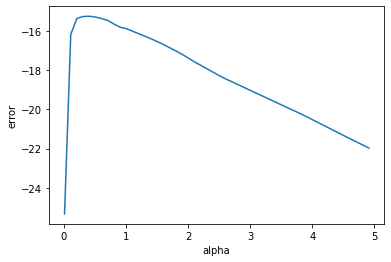

In [10]:
from sklearn.linear_model import Lasso

# Testing Lasso with different values of alpha
alpha=[]
error=[]
for i in range(1,500,10):
    alpha.append(i/100)
    lasso_reg = Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(lasso_reg, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')))
plt.plot(alpha, error)
plt.xlabel("alpha")
plt.ylabel("error")

In [11]:
# Choosing alpha so that it gives the smallest error value
max_index = error.index(max(error))
optimal_alpha = alpha[max_index]

optim_lasso = Lasso(alpha=optimal_alpha)
lasso_score = np.mean(cross_val_score(lasso_reg, X_train, y_train, cv=3, scoring='neg_mean_absolute_error'))
print(lasso_score)

optim_lasso.fit(X_train, y_train)

-21.973593352845445


Lasso(alpha=0.41)

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(n_jobs=-1)
rand_forest_score = np.mean(cross_val_score(rand_forest, X_train, y_train, cv=3, scoring='neg_mean_absolute_error'))
print(rand_forest_score)

-15.192956481481483


In [13]:
# Tune the Random Forest model with GridsearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ('mse', 'mae'), 'n_estimators':range(10,300,10), 'max_features': ('auto', 'sqrt', 'log2')}

CV_rf = GridSearchCV(rand_forest, parameters, scoring='neg_mean_absolute_error', cv= 5)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_score_)
print(CV_rf.best_estimator_)

-14.587361111111111
RandomForestRegressor(criterion='mae', n_estimators=20, n_jobs=-1)


### Testing

In [14]:
y_pred_mult_reg = mult_reg.predict(X_test)
y_pred_lasso = optim_lasso.predict(X_test)
y_pred_rf = CV_rf.best_estimator_.predict(X_test)

test_score_mult_reg = mean_absolute_error(y_test, y_pred_mult_reg)
print('Testing score with multiple linear regression model: ',test_score_mult_reg)

test_score_lasso = mean_absolute_error(y_test, y_pred_lasso)
print('Testing score with lasso model: ',test_score_lasso)

test_score_rf = mean_absolute_error(y_test, y_pred_rf)
print('Testing score with Random Forest model: ',test_score_rf)

Testing score with multiple linear regression model:  22.695444792526942
Testing score with lasso model:  16.66521461007816
Testing score with Random Forest model:  15.758611111111112


### Pickle the model

Pickling converts the object into a byte stream which can be stored, transferred, and converted back to the original model at a later time.

In [15]:
import pickle

pickl = {'model': CV_rf.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [19]:
# Testing the model

file_name = "FlaskAPI2/model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

print(list(X_test.iloc[5,:]))
y_predict = model.predict(np.array(list(X_test.iloc[5,:])).reshape(1,-1))[0]
print ('The predicted salary: ', y_predict)

[3.7, 0.0, 92.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
The predicted salary:  117.825
